# 5) Modeling

Table of Content here

## 5.1) Import necessary packages and load data

In [1]:
# Import packages
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [36]:
import matplotlib.pyplot as plt

In [10]:
from sklearn.model_selection import KFold, cross_val_score

In [13]:
from sklearn.metrics import precision_recall_fscore_support as score

In [29]:
from sklearn.metrics import roc_curve, roc_auc_score

In [14]:
from sklearn.model_selection import GridSearchCV

In [3]:
# Read in the latest dataset
drug_2 = pd.read_csv('../data/drug_2.csv', index_col=0)
print(drug_2.shape)
drug_2.head()

(1885, 43)


,age25-34,age35-44,age45-54,age55-64,age65+,Male,Edu_gr2,Edu_gr3,Edu_gr4,Edu_gr5,...,Education_level,Education,Country,Ethnicity,Age_level,Amyl_binary,Amyl_user,Cannabis_binary,Cannabis_user,Edu_gr
0,0,1,0,0,0,0,0,1,0,0,...,6,Professional certificate,UK,Mixed-White/Asian,3,Non-user,0,Non-user,0,Edu_gr3
1,1,0,0,0,0,1,0,0,0,1,...,9,Doctorate degree,UK,White,2,User,1,User,1,Edu_gr5
2,0,1,0,0,0,1,0,1,0,0,...,6,Professional certificate,UK,White,3,Non-user,0,User,1,Edu_gr3
3,0,0,0,0,0,0,0,0,0,1,...,8,Masters degree,UK,White,1,Non-user,0,User,1,Edu_gr5
4,0,1,0,0,0,0,0,0,0,1,...,9,Doctorate degree,UK,White,3,Non-user,0,User,1,Edu_gr5


## 5.2) Modeling Amyl consumption with Age as numerical type
There are two approaches to treat Age:
i) Consider Age as numerical type. That is to use 'Age_value' as feature (Age_value has 6 levels).
ii) Consider Age as categorical type. That is to use dummies 'age25_34', 'age35_44' and so.
In this section we will do the first approach. And the next section do the second. 

### 5.2.1) Train and test split

In [4]:
col_list = ['Male', 'Edu_gr2', 'Edu_gr3', 'Edu_gr4', 'Edu_gr5', 'Canada', 'New Zealand', 'Other', 'Republic of Ireland', 
            'UK', 'USA', 'Age_value', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']
X = drug_2[col_list]
X.head()

,Male,Edu_gr2,Edu_gr3,Edu_gr4,Edu_gr5,Canada,New Zealand,Other,Republic of Ireland,UK,USA,Age_value,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
0,0,0,1,0,0,0,0,0,0,1,0,0.49788,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084
1,1,0,0,0,1,0,0,0,0,1,0,-0.07854,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575
2,1,0,1,0,0,0,0,0,0,1,0,0.49788,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148
3,0,0,0,0,1,0,0,0,0,1,0,-0.95197,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084
4,0,0,0,0,1,0,0,0,0,1,0,0.49788,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575


In [5]:
y = drug_2['Amyl_user']
y.head()

0    0
1    1
2    0
3    0
4    0
Name: Amyl_user, dtype: int64

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1508, 19) (1508,)
(377, 19) (377,)


### 5.2.2) Random Forest model

#### 5.2.2.1) Explore Random Forest model

In [8]:
print(dir(RandomForestClassifier))
print(RandomForestClassifier())

['__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_feature_names', '_check_n_features', '_compute_oob_predictions', '_estimator_type', '_get_oob_predictions', '_get_param_names', '_get_tags', '_make_estimator', '_more_tags', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_required_parameters', '_set_oob_score_and_attributes', '_validate_X_predict', '_validate_data', '_validate_estimator', '_validate_y_class_weight', 'apply', 'decision_path', 'feature_importances_', 'fit', 'get_params', 'n_features_', 'predict', 'predict_log_proba', 'predict_proba', 'score',

In [9]:
rf = RandomForestClassifier(n_jobs=-1)
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### Explore RandomForestClassifier through Cross-Validation. Use only X_train and y_train.

In [11]:
# Explore RandomForestClassifier through Cross-Validation. Use only X_train and y_train
rf = RandomForestClassifier(n_jobs=-1)
k_fold = KFold(n_splits=5)
cross_val_score(rf, X_train, y_train, cv=k_fold, scoring='accuracy', n_jobs=-1)

array([0.80794702, 0.81788079, 0.81788079, 0.82724252, 0.80730897])

In [12]:
# Use roc_auc as performance measure
cross_val_score(rf, X_train, y_train, cv=k_fold, scoring='roc_auc', n_jobs=-1)

array([0.73397755, 0.74879032, 0.75740358, 0.74801587, 0.74390244])

#### Explore RandomForestClassifier through holdout set. Use both train and test sets

In [15]:
# Fit model with default hyper-parameters
rf_fit = rf.fit(X_train, y_train)

In [16]:
# Output feature importance
sorted(zip(rf_fit.feature_importances_, X_train.columns), reverse=True)
# Yes, similar to what we have in EDA step

[(0.12242663450905042, 'Cscore'),
 (0.11514545930584628, 'Nscore'),
 (0.1144220742437734, 'Oscore'),
 (0.11066689941455875, 'Ascore'),
 (0.1090545563188401, 'Escore'),
 (0.09841159456701842, 'SS'),
 (0.07736107504946627, 'Impulsive'),
 (0.07102014698826864, 'Age_value'),
 (0.03347117805552255, 'Male'),
 (0.03151184892986846, 'USA'),
 (0.026174061488758178, 'UK'),
 (0.020252095605134343, 'Edu_gr4'),
 (0.019680128804221424, 'Edu_gr3'),
 (0.01797576039798906, 'Edu_gr5'),
 (0.009258103788733188, 'Other'),
 (0.009213690762690173, 'Edu_gr2'),
 (0.006269491838442038, 'Canada'),
 (0.0057204191070267365, 'Republic of Ireland'),
 (0.0019647808247915547, 'New Zealand')]

In [24]:
rf_fit.classes_

array([0, 1], dtype=int64)

In [21]:
# Predict on X_test
y_pred = rf_fit.predict(X_test)
y_pred_probs = rf_fit.predict_proba(X_test)
print(y_pred[:5])
print(y_pred_probs[:5])

[0 0 0 0 0]
[[0.83 0.17]
 [0.86 0.14]
 [0.78 0.22]
 [0.99 0.01]
 [0.76 0.24]]


In [28]:
# Output performance
precision, recall, fscore, support = score(y_test, y_pred, pos_label=1, average='binary')
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3),
                                                        round(recall, 3),
                                                        round((y_pred==y_test).sum() / len(y_pred),3)))
# Performance is not greate, but consistent with rough version in EDA

Precision: 0.526 / Recall: 0.123 / Accuracy: 0.788


In [39]:
# Predict on X_train and output train performance
y_pred_train = rf_fit.predict(X_train)
precision_train, recall_train, fscore_train, support_train = score(y_train, y_pred_train, pos_label=1, average='binary')
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision_train, 3),
                                                        round(recall_train, 3),
                                                        round((y_pred_train==y_train).sum() / len(y_pred_train),3)))
# OK, this might be the evidence of overfitting. We have 'max_depth': None and 'min_samples_leaf': 1

Precision: 1.0 / Recall: 1.0 / Accuracy: 1.0


In [38]:
# Output roc_auc
print('roc_auc: {}'.format(round(roc_auc_score(y_test, y_pred_probs[:, 1]), 3)))
# Interesing roc_auc here is smaller than cross-validation

roc_auc: 0.683


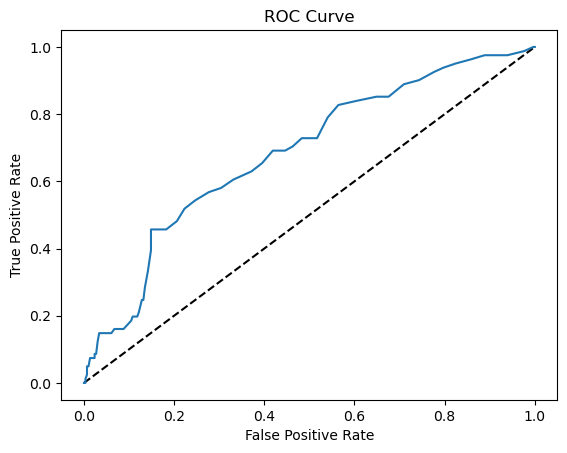

In [37]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs[:, 1])
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
Cont from here
Cont from here
Cont from here
Cont from here
Cont from here

In [ ]:
# Try some not default hyperparameters
rf = RandomForestClassifier(n_estimators=100, max_depth=20, n_jobs=-1)
rf_fit = rf.fit(X_train, y_train)
y_pred = rf_fit.predict(X_test)



In [18]:
rf_fit

RandomForestClassifier(n_jobs=-1)

In [ ]:
Do gridsearch with default setting

In [ ]:
When evaluating new model, probably good idea to delete all model and parameters from the memory